<a href="https://colab.research.google.com/github/NLawrenz/master-thesis/blob/master/Master_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discrinant Analysis
adapted from https://goodboychan.github.io/

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random

## Simulate Data

In [7]:
random.seed(42)

mu0 = [0, 0]
sigma0 = np.array([[1, 0.5], [0.5, 1]])
sigma1 = np.array([[1, 0.5], [0.5, 1]])

X = np.random.multivariate_normal(mu0, sigma0, 5000)
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2

y = np.ones((5000,))
y[:2000] = 0

In [8]:
X[:6, :], y[:6]

(array([[ 0.17824663, -0.83959942],
        [ 0.43779077,  1.92785348],
        [-1.41724247, -0.75713625],
        [ 0.80791511,  0.5060415 ],
        [-0.77586214,  0.78930393],
        [-0.26855277,  0.28208686]]), array([0., 0., 0., 0., 0., 0.]))

## Visualization

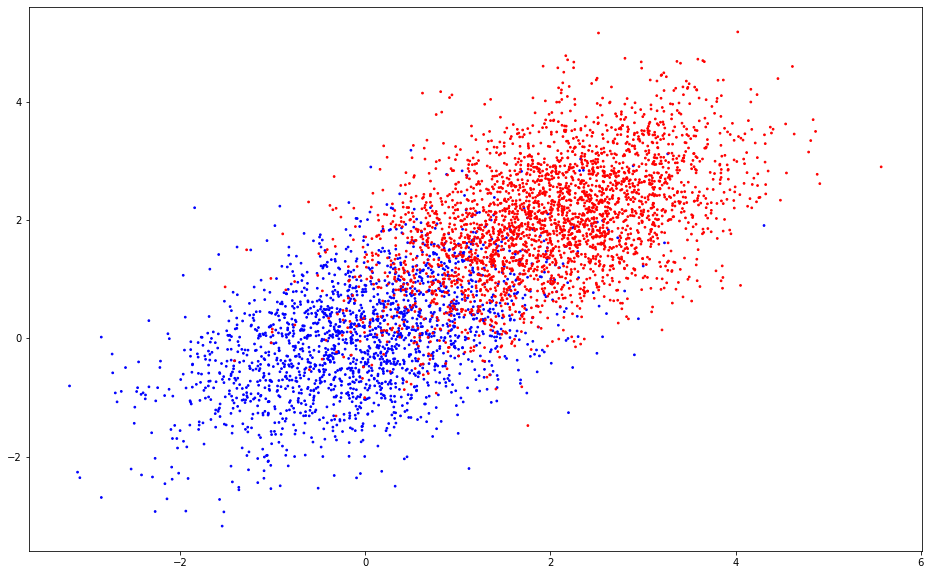

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
plt.show()

## From scratch

In [10]:
mu0 = np.array([[0], [0]])
mu1 = np.array([[2], [2]])

def f_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

def f_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

In [11]:
f_x_y_0(np.array([[0.5], [0.5]]))

0.1555632781262252

In [12]:
f_x_y_1(np.array([[0.5], [0.5]]))

0.041006034909973794

### Sample mean and covariance


In [13]:
mu0_hat = np.mean(X[:2000, :], axis=0)
sigma0_hat = np.cov(X[:2000, :].T)
mu0_hat, sigma0_hat

(array([-0.01035623,  0.01482767]), array([[1.02371651, 0.45515467],
        [0.45515467, 0.93129588]]))

In [14]:
mu1_hat = np.mean(X[2000:, :], axis=0)
sigma1_hat = np.cov(X[2000:, :].T)
mu1_hat, sigma1_hat

(array([1.9832128 , 1.99149374]), array([[0.99377618, 0.48132199],
        [0.48132199, 0.99127722]]))

### Define the PDF function

In [15]:
def fhat_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

In [16]:
fhat_x_y_0(np.array([[0.5], [0.5]]))

0.1535341839490467